### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

Gamma是对过去的Reward的一种惩罚，它可以避免无限循环链出现奖励无穷大的情况。

$G_t=R_{t+1}+\gamma{R_{t+2}}+\gamma^{2}{R_{t+3}}+\gamma^{3}{R_{t+4}}+\cdots$

另外一种解释方法是：我们需要模型更偏爱眼前的利益，而对于未来的利益不那么敏感

2. Please breifly explain what is value function and what is Q function ?


**Value Function:**

$V_\pi(s)=E_\pi[G_t|S_t=s]$，是在某个状态s下，Rewards的期望值。适用于路线不唯一且具有随机性的步骤。

其中 $G_t=R_{t+1}+\gamma{R_{t+2}}+\gamma^{2}{R_{t+3}}+\gamma^{3}{R_{t+4}}+\cdots$

**Q Function:**

$Q_\pi(s,a)=E_\pi[G_t|S_t=s,A_t=a]$，是在某个状态s下，已经采取动作a后，Rewards的期望值。

其中 $G_t=R_{t+1}+\gamma{R_{t+2}}+\gamma^{2}{R_{t+3}}+\gamma^{3}{R_{t+4}}+\cdots$

3. How temperal difference related to dynamic programming and monte-carlo methods ?

**动态规划算法会遍历所有状态点来计算，而蒙特卡洛只会通过采样的状态点来计算**

**动态规划适用于状态空间较小的情况，蒙特卡洛适合于复杂状态空间情况**

**Temporal Difference Learning则是动态规划和蒙特卡洛的结合**

**即，一部分用蒙特卡洛采样解，一部分用Bellman Equation解。**

优劣势比较：

**TD相较于蒙特卡洛，bias升高（需要用概率估计值），variance降低（减少了随机采样）**

**TD相较于蒙特卡洛，计算更快；相较于DP，不需要知道Transition Probability。**

4. Please briefly describe what are value iteration and policy iteration ?

**值迭代**先对所有状态**初始化一个值**，然后使用Value Function$V(S_t)=r+\sum_{P}{P(S_{t+1}|S_t)}V(S_{t+1})$进行值的更新，然后不断迭代，直到收敛 |W_t+1 - W_t| ≤ δ：
![](http://uricc.ga/images/2020/02/07/Bellman-iteration.png)

其中有两种做法，一种是一次计算，同时更新，另一种是将更新后的值作为下一个格子的输入值进行更新。这两种做法都是可取的。

**策略迭代**先对所有状态**初始化一个随机策略**，然后使用Q-function，进行最佳策略的更新，然后不断迭代，直到收敛。

![](http://uricc.ga/images/2020/02/07/Bellman-iteration2.png)

5. How can we use deep lerning in reinforcement learning ?

可以用Deep Learning来当作Q函数的函数拟合方法。

输入states，输出Q-value for different actions（每个动作所应该有的概率值）

### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [2]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

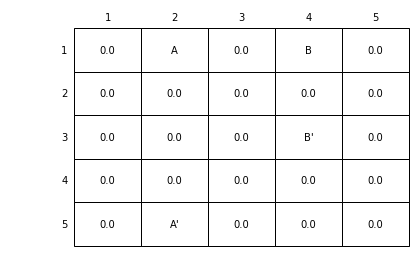

In [3]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

In [4]:
import numpy as np